<a href="https://colab.research.google.com/github/adiebatic/Coursework-Samples/blob/master/AP156_Week5_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reproduce figures 7.8, 7.9 and 7.10.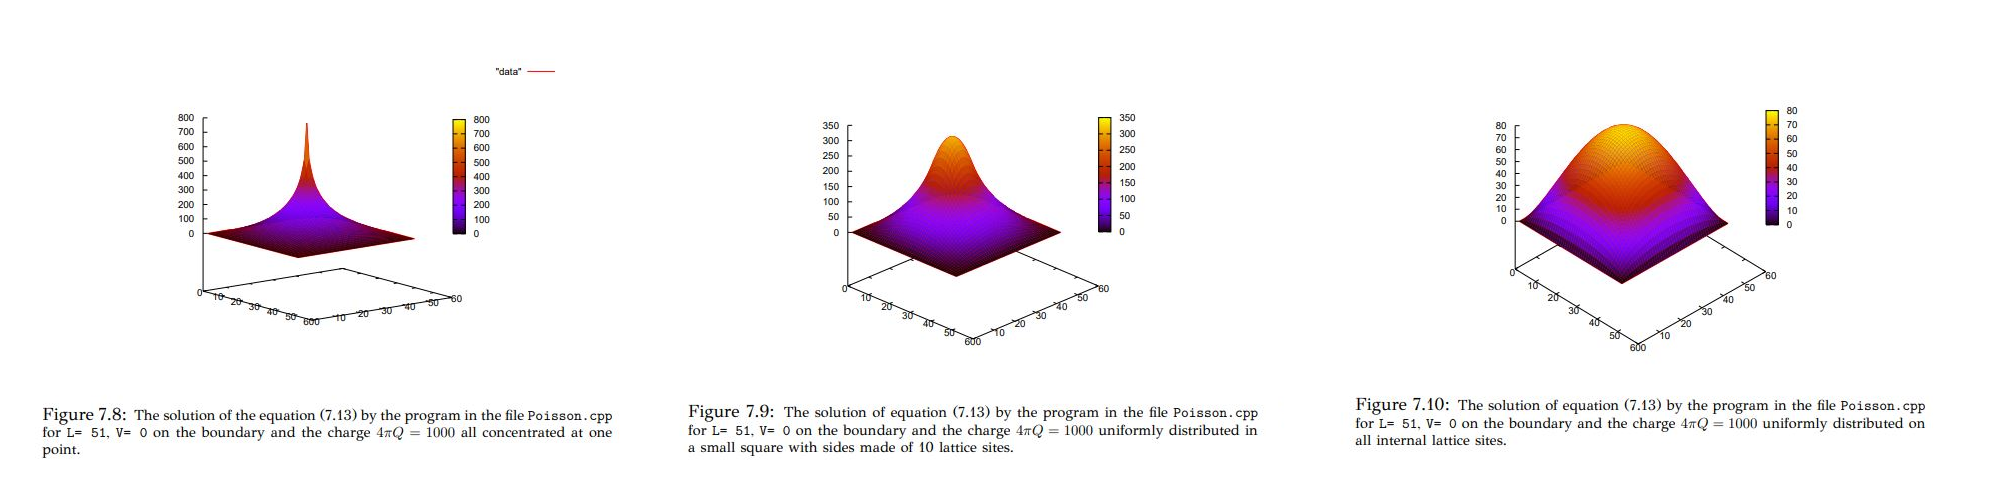

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np



In [2]:
# Constants

L = 51  # length of lattice (L = 51 in CP)
M = 51   # no. of points per unit length 

# For simplicity, we assume that L = M

In [3]:
# Lattice

xcenter = int(M/2)
ycenter = int(M/2)

def rho_tilde(M, case):

  r_tilde = np.zeros([M, M], float)
  rho = 1000

  # One lattice point at the center
  if case == 'a':
    rho_a = rho                           # total charge over area
    r_tilde[xcenter, ycenter] = rho_a

  # 10 by 10 square lattice: 100 lattice points at the center
  if case == 'b':
    rho_b = rho/100                      # total charge over area
    for i in range(xcenter - 5, xcenter + 6):
      for j in range(ycenter - 5, ycenter + 6):
        r_tilde[i,j] = rho_b          

  # All internal lattice points
  if case == 'c':
    rho_c = rho/M**2                     # total charge over area
    for i in range(1,M-1):
      for j in range(1,M-1):
        r_tilde[i,j] = rho_c
  
  return r_tilde




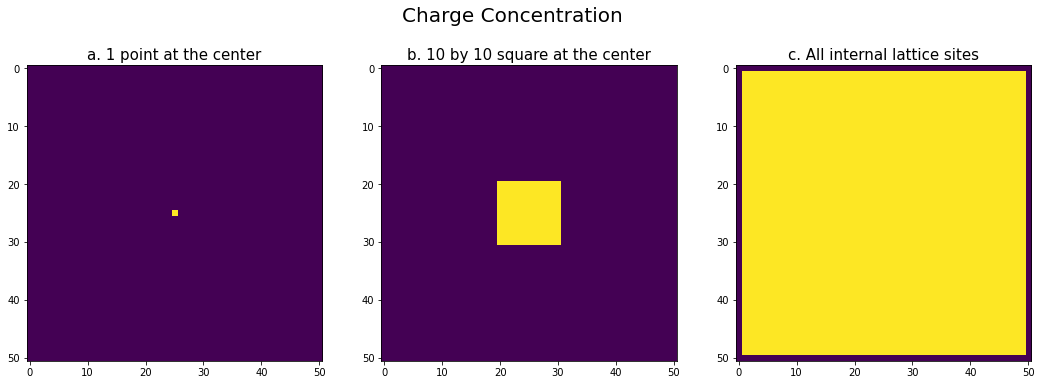

In [4]:
rho_1 = rho_tilde(M, 'a')
rho_2 = rho_tilde(M, 'b')
rho_3 = rho_tilde(M, 'c')

fig = plt.figure(figsize=(18,6))

plt.subplot(131)
plt.imshow(rho_1)
plt.title('a. 1 point at the center', fontsize = 15)

plt.subplot(132)
plt.imshow(rho_2)
plt.title('b. 10 by 10 square at the center', fontsize = 15)

plt.subplot(133)
plt.imshow(rho_3)
plt.title('c. All internal lattice sites', fontsize = 15)

plt.suptitle('Charge Concentration', fontsize=20)
plt.show()

In [5]:
# Potential

def potential(rho_tilde):

  # BC: V = 0 at boundaries
  Potential = np.zeros([M,M], float)
  Potential_ave = np.zeros([M,M], float)
  
  epsilon = np.inf
  accuracy = 0.00000000000001

  while epsilon > accuracy:
    for i in range(1,M-1):
      for j in range(1,M-1):
        Potential_ave[i,j] = 0.25*(Potential[i-1, j] + Potential[i+1, j] + Potential[i, j-1] + Potential[i, j+1] + rho_tilde[i,j])

        epsilon = np.abs(Potential[i,j] - Potential_ave[i,j])
        Potential =  Potential_ave.copy() 

  return Potential


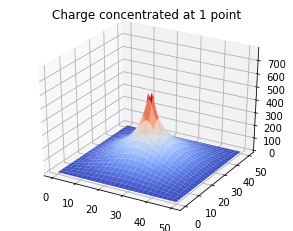

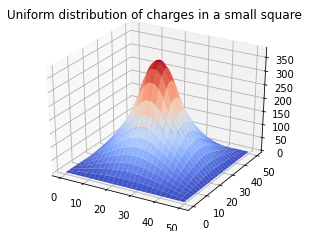

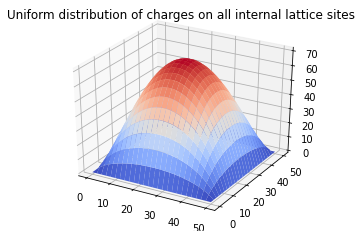

In [6]:
# Plots

x = np.arange(0,M)
y = np.arange(0,M)
X, Y = np.meshgrid(x,y)

# Fig 7.8
fig = plt.figure(figsize=(5,4))
ax = fig.gca(projection='3d')
ax.set_title("Charge concentrated at 1 point")
ax.plot_surface(X,Y,potential(rho_tilde(M,'a')), cmap=cm.coolwarm)

# Fig 7.9
fig = plt.figure(figsize=(5,4))
ax = fig.gca(projection='3d')
ax.set_title("Uniform distribution of charges in a small square")
ax.plot_surface(X,Y,potential(rho_tilde(M,'b')), cmap=cm.coolwarm)

# Fig 7.10
fig = plt.figure(figsize=(5,4))
ax = fig.gca(projection='3d')
ax.set_title("Uniform distribution of charges on all internal lattice sites")
ax.plot_surface(X,Y,potential(rho_tilde(M,'c')), cmap=cm.coolwarm)


